In [166]:
import geopandas as gpd
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [19]:
# GPS points for 3S sampling
nov3s = gpd.read_file('data/3S_GPS/Waypoints_21-NOV-23.gpx')
# Filter out mistakes (unnamed)
nov3s = nov3s[nov3s['name'].str.match("[^0]")]
# Save as geojson
#nov3s.to_file('data/nov_3s.geojson', driver = 'GeoJSON')


In [122]:
# Look at other files (there are 25 total)
gdf = nov3s
for filename in os.listdir('data/3S_GPS'):
    if filename != 'Waypoints_21-NOV-23.gpx':
        gdf = pd.concat([gdf, gpd.read_file(f'data/3S_GPS/{filename}')])

# Add a categorical variable with month and year
gdf['time_string'] = [t.strftime('%Y-%m') for t in gdf['time']]

# drop NaN columns and column for symbol in garmin
gdf = gdf.dropna(axis=1).drop('sym', axis = 1)

# add a column for local time
gdf['time_local'] = [dt.astimezone(datetime.timezone(datetime.timedelta(hours=7))) for dt in gdf['time']]

gdf

,ele,time,name,geometry,time_string,time_local
0,41.848339,2023-11-21 01:12:03+00:00,KSCS2-S1,POINT (105.98069 13.57521),2023-11,2023-11-21 08:12:03+07:00
1,44.701454,2023-11-21 02:30:30+00:00,KSCS-2,POINT (105.98251 13.57347),2023-11,2023-11-21 09:30:30+07:00
2,44.824028,2023-11-21 02:45:42+00:00,KSCS-3,POINT (105.97936 13.56476),2023-11,2023-11-21 09:45:42+07:00
3,46.226585,2023-11-21 03:19:29+00:00,STS-1,POINT (105.94277 13.52597),2023-11,2023-11-21 10:19:29+07:00
4,48.920631,2023-11-21 04:03:58+00:00,STS-2,POINT (105.93996 13.52898),2023-11,2023-11-21 11:03:58+07:00
...,...,...,...,...,...,...
2,87.268166,2022-06-27 06:14:10+00:00,M1-5,POINT (106.42527 13.46552),2022-06,2022-06-27 13:14:10+07:00
3,88.015541,2022-06-27 06:26:27+00:00,E1-6,POINT (106.43031 13.47476),2022-06,2022-06-27 13:26:27+07:00
0,49.012001,2023-11-29 10:56:20+00:00,032,POINT (105.99200 13.53135),2023-11,2023-11-29 17:56:20+07:00
1,48.700977,2023-11-29 10:57:17+00:00,033,POINT (105.98784 13.53058),2023-11,2023-11-29 17:57:17+07:00


In [128]:
# Names look pretty clean for the most part. 
# Remove any points where the name doesn't have any letters

# don't do this: it removes points with a letter at the beginning (eg 3SB)
# gdf = gdf[gdf['name'].str.match("\D")]
# I don't know what the difference is between match and contains but contains seems to work 
# as I would expect and match does not.  
gdf = gdf.loc[gdf['name'].str.contains('\D'), :]

In [79]:
# Plot the points to see what we're working with
 
# import shapefiles for borders and rivers
#borders = gpd.read_file('data/asia-shp/yg089df0008.shp')
#rivers = gpd.read_file('data/gmsriversadb/gms_river.shp')


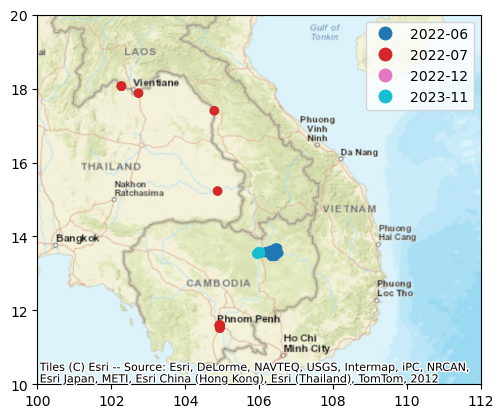

In [117]:
import contextily
fig, ax = plt.subplots()
gdf.plot(ax = ax, column='time_string', legend=True)
#rivers[rivers['Strahler'] > 3].plot(ax = ax, alpha=0.5, linewidth=2)
ax.set_ylim(10, 20)
ax.set_xlim(100, 112)
contextily.add_basemap(ax, 
                       crs=gdf.crs.to_string(), 
                       source=contextily.providers.Esri.WorldStreetMap)


In [129]:
# Add a column to classify points depending on campaign
gdf.loc[:,'campaign'] = pd.Series()
gdf

,ele,time,name,geometry,time_string,time_local,campaign
0,41.848339,2023-11-21 01:12:03+00:00,KSCS2-S1,POINT (105.98069 13.57521),2023-11,2023-11-21 08:12:03+07:00,NaN
1,44.701454,2023-11-21 02:30:30+00:00,KSCS-2,POINT (105.98251 13.57347),2023-11,2023-11-21 09:30:30+07:00,NaN
2,44.824028,2023-11-21 02:45:42+00:00,KSCS-3,POINT (105.97936 13.56476),2023-11,2023-11-21 09:45:42+07:00,NaN
3,46.226585,2023-11-21 03:19:29+00:00,STS-1,POINT (105.94277 13.52597),2023-11,2023-11-21 10:19:29+07:00,NaN
4,48.920631,2023-11-21 04:03:58+00:00,STS-2,POINT (105.93996 13.52898),2023-11,2023-11-21 11:03:58+07:00,NaN
...,...,...,...,...,...,...,...
4,85.414093,2022-06-26 08:58:26+00:00,SREPOK-3,POINT (106.47203 13.52016),2022-06,2022-06-26 15:58:26+07:00,NaN
0,85.385376,2022-06-27 05:33:37+00:00,M1-4,POINT (106.40513 13.46490),2022-06,2022-06-27 12:33:37+07:00,NaN
1,85.267189,2022-06-27 05:48:09+00:00,E1-5,POINT (106.40483 13.46987),2022-06,2022-06-27 12:48:09+07:00,NaN
2,87.268166,2022-06-27 06:14:10+00:00,M1-5,POINT (106.42527 13.46552),2022-06,2022-06-27 13:14:10+07:00,NaN


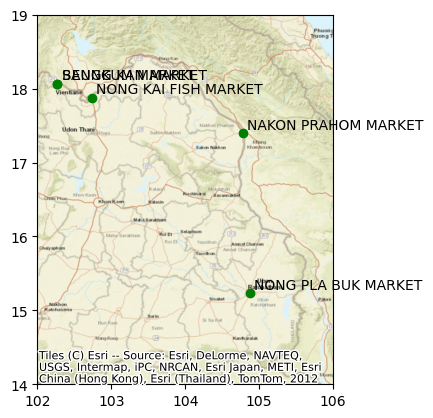

In [118]:
# Start with a map near Vientiane
# It's some fish markets, apparently
# These are a separate project where Ben bought fish samples
fig, ax = plt.subplots()
gdf.plot(ax = ax, color = "green")
#rivers[rivers['Strahler'] > 3].plot(ax = ax, alpha=0.5, linewidth=2)
# Add labels
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf.name):
    ax.annotate(label, xy=(x, y), xytext=(3,3), textcoords='offset points')
ax.set_ylim(14, 19)
ax.set_xlim(102, 106)
contextily.add_basemap(ax, 
                       crs=gdf.crs.to_string(), 
                       source=contextily.providers.Esri.WorldStreetMap)

In [131]:
gdf.loc[gdf['name'].str.contains("MARKET"), 'campaign'] = 'Fish'

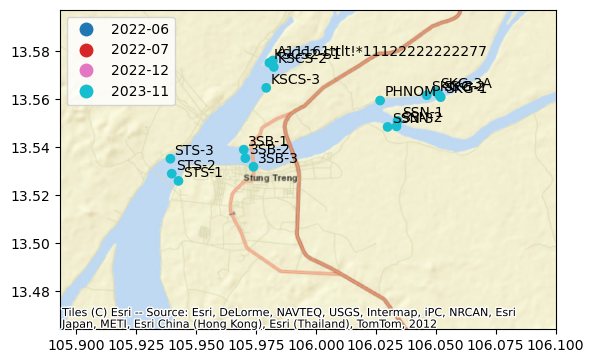

In [132]:
# Now let's zoom way in on Stung Treng
# This is bbox for 3S samples from Nov, 2023
(xmin, ymin, xmax, ymax)= [105.8932, 13.4641, 106.1, 13.59725]
fig, ax = plt.subplots()
gdf.plot(ax = ax, column='time_string', legend=True)
#rivers[rivers['Strahler'] > 3].plot(ax = ax, alpha=0.5, linewidth=2)
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf.name):
    ax.annotate(label, xy=(x, y), xytext=(3,3), textcoords='offset points')
ax.set_ylim(ymin, ymax)
ax.set_xlim(xmin, xmax)
contextily.add_basemap(ax, 
                       crs=gdf.crs.to_string(), 
                       source=contextily.providers.Esri.WorldStreetMap)


In [133]:
# There is one site name which is clearly a mistake
gdf = gdf.loc[-gdf['name'].str.contains('!'), :]


In [139]:
# look at names of points near Stung Treng 
stung_treng_gdf = gdf.loc[gdf['time_string'] == '2023-11']
#stung_treng_gdf['time_local'] = stung_treng_gdf['time']
stung_treng_gdf.sort_values("time")
# What are SKG-3A and PHNOM? 

# Set this campaign to 3S
gdf.loc[gdf['time_string'] == '2023-11', 'campaign'] = '3S'

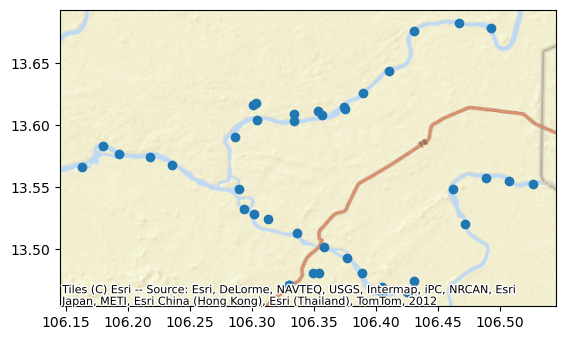

In [141]:
# June, 2022

ax = gdf.loc[gdf['time_string'] == '2022-06'].plot()
contextily.add_basemap(ax, 
                       crs=gdf.crs.to_string(), 
                       source=contextily.providers.Esri.WorldStreetMap)

In [165]:
gdf.loc[gdf['time_string'] == '2022-06', 'campaign'] = 'Sesan2'

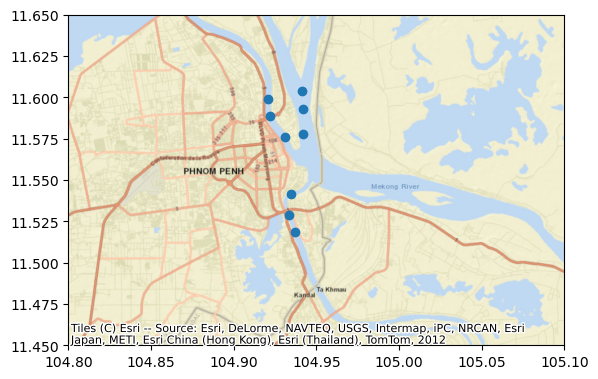

In [168]:
# Looks like some points around phnom penh
ax = gdf.loc[np.logical_and(gdf['time_string'] == '2022-07', gdf['name'].str.contains('\d'))].plot()
ax.set_xlim(104.8, 105.1)
ax.set_ylim(11.45, 11.65)
contextily.add_basemap(ax, 
                       crs=gdf.crs.to_string(), 
                       source=contextily.providers.Esri.WorldStreetMap)


In [170]:
gdf.loc[np.logical_and(gdf['time_string'] == '2022-07', gdf['name'].str.contains('\d')), 'campaign'] = 'Phnom_Penh'

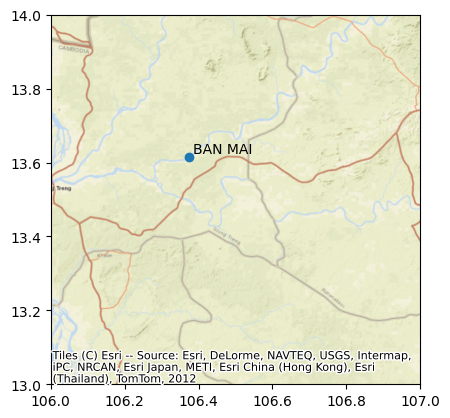

In [182]:
# Still just one odd guy out, from December 2022... 
ax = gdf[pd.isnull(gdf['campaign'])].plot()
ax.set_xlim(106, 107)
ax.set_ylim(13, 14)
contextily.add_basemap(ax, 
                       crs=gdf.crs.to_string(), 
                       source=contextily.providers.Esri.WorldStreetMap)
for x, y, label in zip(gdf[pd.isnull(gdf['campaign'])].geometry.x, gdf[pd.isnull(gdf['campaign'])].geometry.y, gdf[pd.isnull(gdf['campaign'])].name):
    ax.annotate(label, xy=(x, y), xytext=(3,3), textcoords='offset points')



gdf[pd.isnull(gdf['campaign'])]


In [ ]:


# I'll just call it ban mai
gdf.loc[gdf['name'] == 'BAN MAI', 'campaign'] = 'ban_mai'

In [183]:
gdf[pd.isnull(gdf['campaign'])]

,ele,time,name,geometry,time_string,time_local,campaign


In [184]:
#gdf.to_file('data/mekong_sampling_locations.geojson', driver = 'GeoJSON')